# Janelia's carbon footprint consists of emissions from
* electricity
* gas
* travel
* commuting
* conferences
* food

In [1]:
PeopleAtJanelia = 800

### Gas

In [2]:
thermGas = 150000 * 12 # therms per year
thermToBtu = 100000 # btus per therm
BTUToPoundsCO2 = 117.0/1E6 # pounds of CO2 emitted per btu
# (source: https://www.eia.gov/tools/faqs/faq.php?id=73&t=11)
poundsToMetricTons = 1/2204.623
CO2FromGas = thermGas * thermToBtu * BTUToPoundsCO2 * poundsToMetricTons / PeopleAtJanelia
print(CO2FromGas)

# Can directly use the calculator here to arrive at a slightly different value:
# https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references

11.940817092083318


### Electricity

In [3]:
kWh = 3E6 * 12 # kWh per year
kWhToCO2 = 743.3/1E3 * poundsToMetricTons
# source: https://www.epa.gov/sites/production/files/2020-01/documents/egrid2018_summary_tables.pdf
CO2FromElectric = kWh * kWhToCO2 / PeopleAtJanelia
print(CO2FromElectric)

15.171981785547914


### Air travel - Janelians

In [4]:
milesPerGroupLeader = 250000/4
milesPerLabMember = 100000/20
gallonsPerMile = 1/51 
# source: https://www.sierraclub.org/sierra/ask-mr-green/whats-better-for-environment-driving-or-flying
CO2PerGallon = 9.57 / 1000
# source: https://www.eia.gov/environment/emissions/co2_vol_mass.php
CO2FromAir = (4 * milesPerGroupLeader + 20 * milesPerLabMember)/24 * gallonsPerMile * CO2PerGallon
print(CO2FromAir)

2.7365196078431375


### Commuting

In [5]:
milesPerDay = 20
daysPerYear = 250
mpg = 24.7 # source: https://www.reuters.com/article/us-autos-emissions-idUSKBN1F02BX
CO2PerGallon = 8.89 / 1000
# source: https://www.eia.gov/environment/emissions/co2_vol_mass.php
CO2FromCommuting = milesPerDay * daysPerYear * 1/mpg * CO2PerGallon
print(CO2FromCommuting)

1.799595141700405


### Air travel - conference visitors

In [6]:
numConferences = 12
numTravelers = 50
numMiles = 3000
CO2FromConferences = numConferences * numTravelers * numMiles * gallonsPerMile * CO2PerGallon / PeopleAtJanelia
print(CO2FromConferences)

0.39220588235294124


### Food

In [7]:
percentCaloriesAtJanelia = 0.4
tonsPerYearFood = 7
# source: https://www.nature.org/en-us/get-involved/how-to-help/carbon-footprint-calculator/
CO2FromFood = tonsPerYearFood * percentCaloriesAtJanelia
print(CO2FromFood)

2.8000000000000003


### Plots

In [8]:
totalEmissions = CO2FromGas + CO2FromElectric + CO2FromAir + CO2FromCommuting + CO2FromConferences + CO2FromFood
print(totalEmissions)

34.841119509527715


In [22]:
import pandas as pd
totalEmissions = pd.DataFrame({'type':['gas','electricity','air travel','commute','conferences','food'],
                               'emissions':[CO2FromGas,CO2FromElectric,CO2FromAir,CO2FromCommuting,CO2FromConferences,CO2FromFood]})
import plotly.express as px
fig = px.pie(totalEmissions,
             values='emissions',
             names='type',
             title='annual emissions for an average Janelian = 35 metric tons per year',
             color_discrete_sequence=list(reversed(px.colors.sequential.Blugrn)))
fig.show()
fig.write_image('JaneliaEmissions.pdf')

### Plot the electricity and gas over time

C:\Users\turnerevansd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



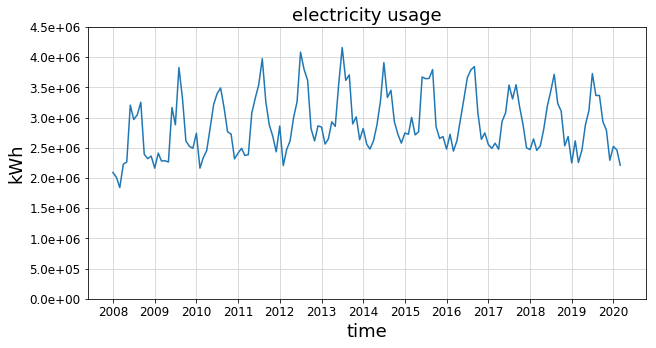

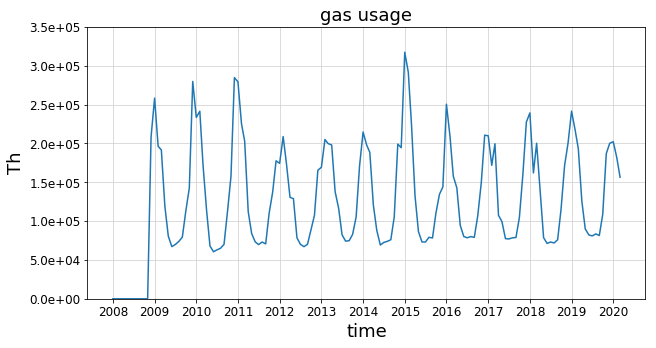

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick


EnGDat = pd.read_csv("C:\\Users\\turnerevansd\\Documents\\Python Scripts\\JaneliasCarbonFootprint\\JaneliaElectricityAndGas.csv")
EnGDat['Time'] =  pd.to_datetime(EnGDat['Time'].astype(str),infer_datetime_format=True)
EnGDat['kWh'] = EnGDat['kWh'].replace({',':''},regex=True).astype(str).astype(int)
EnGDat['Th'][0:11] = 0
EnGDat['Th'] = EnGDat['Th'].replace({',':''},regex=True).astype(str).astype(int)

fntSz = 18

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(EnGDat['Time'], EnGDat['kWh'])
ax.set_ylim([0,4500000])
plt.xlabel('time',fontsize=fntSz)
plt.ylabel('kWh',fontsize=fntSz)
plt.title('electricity usage',fontsize=fntSz)
plt.grid(True,color='lightgray')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
fig.savefig("JaneliaElectricity.pdf")

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(EnGDat['Time'], EnGDat['Th'])
ax.set_ylim([0,350000])
plt.xlabel('time',fontsize=fntSz)
plt.ylabel('Th',fontsize=fntSz)
plt.title('gas usage',fontsize=fntSz)
plt.grid(True,color='lightgray')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
fig.savefig("JaneliaGas.pdf")